## Data Importing 

In [110]:
import pandas as pd
pd.set_option('display.max_colwidth', None) #Displaying max col width without truncation
File = pd.read_csv("Main data.csv", index_col = "S.N.")
HHS = pd.DataFrame(File)

In [111]:
Selected = HHS[["Name of the Household head",
             "Age of Household head",
             "Number of members below 5 years",
             "Number of members above 65 years",
             "Gender of Household head",
             "Municipality name",
             "Settlement name",
             "House GPS latitude",
             "House GPS longitude",
             "House GPS altitude",
             "Name of Community Forest with membership",
             "Education level of Household head",
             "Caste of Household head",
             "Family size",
             "Household member with disability",
             "Land ownership in Square meters",
             "House structure type",
             "Distance from Community Forest to home (in meters)",
             "Main source of livelihood",
             "Trend of wildfire occurence in your area in last 10 years",
             "Self-assessment of knowledge and experience regarding wildfire risks and causes",
             "Level of familiarity regarding methods of wildfire mitigation and control",
             "Confidence regarding local capacity for identifying wildfire-prone areas",
             "Degree of wildfire risk in the area",
             "Preparedness of the local community for wildfire mitigation and control",
             "Afforestation (Conservation/restoration practice adopted)", 
             "Agroforestry (Conservation/restoration practice adopted)",
             "Controlled grazing (Conservation/restoration practice adopted)",
             "Construction of water retention/embankment infrastructure (Conservation/restoration practice adopted)",
             "Terrace farming (Conservation/restoration practice adopted)",
             "Wetland restoration (Conservation/restoration practice adopted)",
             "Fireline construction (Conservation/restoration practice adopted)"]]
false_index = Selected.index[486] #somehow we have an extra NaN row at the end of our main csv file that needs to be dropped
Selected = Selected.drop(false_index, axis = 0)

In [112]:
Selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 1.0 to 486.0
Data columns (total 32 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Name of the Household head                                                                             486 non-null    object 
 1   Age of Household head                                                                                  484 non-null    float64
 2   Number of members below 5 years                                                                        458 non-null    float64
 3   Number of members above 65 years                                                                       486 non-null    float64
 4   Gender of Household head                                                                           

# Non-spatial Analysis

## Data Preprocessing

### Age (Float/Ratio Variable)

In [113]:
#Continuous variables shall be left unchanged
Age = Selected["Age of Household head"]
Age = pd.DataFrame(Age)
Age.tail()

,Age of Household head
S.N.,
482.0,52.0
483.0,53.0
484.0,47.0
485.0,42.0
486.0,38.0


### Age below 5 years (Float/Ratio Variable)

In [114]:
#The continuous variable will be left unchanged
import numpy as np
Below_5 = Selected["Number of members below 5 years"]
Below_5 = pd.DataFrame(Below_5)
Below_5.replace(np.nan, 0, inplace = True)
Below_5.head()

,Number of members below 5 years
S.N.,
1.0,2.0
2.0,0.0
3.0,0.0
4.0,1.0
5.0,0.0


### Age above 65 years (Float/Ratio Variable)

In [115]:
#The continuous variable will be left unchanged
Above_65 = Selected["Number of members above 65 years"]
Above_65 = pd.DataFrame(Above_65)
Above_65.head()

,Number of members above 65 years
S.N.,
1.0,1.0
2.0,0.0
3.0,0.0
4.0,0.0
5.0,2.0


### Gender (Object/Nominal variable)

In [116]:
Gender_names = Selected["Gender of Household head"]
Gender_names = pd.DataFrame(Gender_names)
Gender_names.value_counts()

Gender of Household head
Male                        380
Female                      106
Name: count, dtype: int64

In [117]:
#The Nominal (Categorical) variable needs to be OneHotEncoded
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first",
                           handle_unknown = "ignore")
Gender = OH_encoder.fit_transform(Gender_names) #the values shall now be incoded in the form of numpy array
Gender = pd.DataFrame(Gender, columns = OH_encoder.get_feature_names_out(Gender_names.columns))
Gender.tail()

,Gender of Household head_Male
481,0.0
482,1.0
483,1.0
484,1.0
485,0.0


### Education level of the household head (Object/Nominal variable)

In [118]:
Selected["Education level of Household head"].replace("Graduate", "AGraduate", inplace = True) #So that this "other" comes first in line to be dropped during OHE
Selected["Education level of Household head"].value_counts()

Education level of Household head
Literate           311
Secondary level     89
Illiterate          69
AGraduate           17
Name: count, dtype: int64

In [119]:
#Creating a temporary caste dataframe to extract column names for OHE
Education_names = Selected["Education level of Household head"]
Education_names = pd.DataFrame(Education_names)

In [120]:
#The Nominal (Categorical) variable needs to be OneHotEncoded. We have decided to treat education as nominal instead of ordinal variable
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first",
                           handle_unknown = "ignore")
Education = OH_encoder.fit_transform(Education_names) #the values shall now be incoded in the form of numpy array
Education = pd.DataFrame(Education, columns = OH_encoder.get_feature_names_out(Education_names.columns))
Education.tail()

,Education level of Household head_Illiterate,Education level of Household head_Literate,Education level of Household head_Secondary level
481,0.0,1.0,0.0
482,0.0,1.0,0.0
483,0.0,1.0,0.0
484,0.0,1.0,0.0
485,0.0,1.0,0.0


### Caste (Object/Nominal variable)

In [121]:
Selected["Caste of Household head"].value_counts()

Caste of Household head
Brahmin/Chhetri    262
Indigenous         116
Dalit              100
Others               8
Name: count, dtype: int64

In [122]:
#Creating a temporary caste dataframe to extract column names for OHE
Caste_names = Selected["Caste of Household head"]
Caste_names = pd.DataFrame(Caste_names)
Caste_names.value_counts()

Caste of Household head
Brahmin/Chhetri            262
Indigenous                 116
Dalit                      100
Others                       8
Name: count, dtype: int64

In [123]:
#The Nominal (Categorical) variable needs to be OneHotEncoded
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first",
                           handle_unknown = "ignore")
Caste = OH_encoder.fit_transform(Caste_names) #the values shall now be incoded in the form of numpy array
Caste = pd.DataFrame(Caste, columns = OH_encoder.get_feature_names_out(Caste_names.columns))
Caste.tail()

,Caste of Household head_Dalit,Caste of Household head_Indigenous,Caste of Household head_Others
481,0.0,0.0,0.0
482,0.0,0.0,0.0
483,0.0,0.0,0.0
484,0.0,0.0,0.0
485,0.0,0.0,0.0


### Municipality name (Float/Ratio variable)

In [124]:
#Creating a temporary caste dataframe to extract column names for OHE
Municipality_names = Selected["Municipality name"]
Municipality_names = pd.DataFrame(Municipality_names)
Municipality_names.value_counts()

Municipality name       
Buddhabhumi Municipality    122
Chure Rural Municipality    122
Bheri Ganga Municipality    121
Sitganga Municipality       121
Name: count, dtype: int64

In [125]:
#The Nominal (Categorical) variable needs to be OneHotEncoded
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first",
                           handle_unknown = "ignore")
Municipality = OH_encoder.fit_transform(Municipality_names) #the values shall now be incoded in the form of numpy array
Municipality = pd.DataFrame(Municipality, columns = OH_encoder.get_feature_names_out(Municipality_names.columns))
Municipality.tail()

,Municipality name_Buddhabhumi Municipality,Municipality name_Chure Rural Municipality,Municipality name_Sitganga Municipality
481,0.0,0.0,1.0
482,0.0,0.0,1.0
483,0.0,0.0,1.0
484,0.0,0.0,1.0
485,0.0,0.0,1.0


### Family size (Float/Ratio variable)

In [126]:
#The continuous variable shall be unchanged
Family_size = Selected["Family size"]
Family_size = pd.DataFrame(Family_size)
Family_size.head()

,Family size
S.N.,
1.0,6.0
2.0,5.0
3.0,6.0
4.0,8.0
5.0,9.0


### Person with Disability (Object/Nominal variable)

In [127]:
#Creating a temporary caste dataframe to extract column names for OHE
Disability_yes = Selected["Household member with disability"]
Disability_yes = pd.DataFrame(Disability_yes)
Disability_yes.value_counts()

Household member with disability
No                                  453
Yes                                  33
Name: count, dtype: int64

In [128]:
#The Nominal (Categorical) variable needs to be OneHotEncoded
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first",
                           handle_unknown = "ignore")
Disability = OH_encoder.fit_transform(Disability_yes) #the values shall now be incoded in the form of numpy array
Disability = pd.DataFrame(Disability, columns = OH_encoder.get_feature_names_out(Disability_yes.columns))
Disability.head()

,Household member with disability_Yes
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Land ownership in Square meters (Float/Ratio variable)

In [129]:
#The Continuous variable shall be kept unchanged
Land_ownership = Selected["Land ownership in Square meters"]
Land_ownership = pd.DataFrame(Land_ownership)
Land_ownership.head()

,Land ownership in Square meters
S.N.,
1.0,1693.15
2.0,1526.16
3.0,508.72
4.0,4578.48
5.0,1526.16


### House Structure Type (Object/Nominal variable)

In [130]:
Selected["House structure type"].value_counts()

House structure type
Tin/Thatch/Straw          209
Cement/Concrete           182
Stone, bricks, and mud     93
Name: count, dtype: int64

In [131]:
#Creating a temporary caste dataframe to extract column names for OHE
House_type_names = Selected["House structure type"]
House_type_names = pd.DataFrame(House_type_names)
House_type_names["House structure type"].replace("Stone, bricks, and mud", "AStone, bricks, and mud", inplace = True) #for targeted dropping in OHE

In [132]:
#The Nominal (Categorical) variable needs to be OneHotEncoded
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first",
                           handle_unknown = "ignore")
House_type = OH_encoder.fit_transform(House_type_names) #the values shall now be incoded in the form of numpy array
House_type = pd.DataFrame(House_type, columns = OH_encoder.get_feature_names_out(House_type_names.columns))
House_type.drop(columns = "House structure type_nan", inplace = True)
House_type.head()

,House structure type_Cement/Concrete,House structure type_Tin/Thatch/Straw
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


### Distance from Community Forest to home (Float/Ratio variable)

In [133]:
#Continuous variables shall be unchanged
CF_to_Home = Selected["Distance from Community Forest to home (in meters)"]
CF_to_Home = pd.DataFrame(CF_to_Home)
CF_to_Home.head()

,Distance from Community Forest to home (in meters)
S.N.,
1.0,1000.0
2.0,25.0
3.0,20.0
4.0,20.0
5.0,55.0


### Main Source of livelihood (Object/Nominal variable)

In [134]:
Selected["Main source of livelihood"].value_counts()

Main source of livelihood
Agriculture           244
Foreign Employment     95
Labor work             59
Employment             42
Business               42
Pension                 4
Name: count, dtype: int64

In [135]:
#Creating a temporary caste dataframe to extract column names for OHE
Livelihood_names = Selected["Main source of livelihood"]
Livelihood_names = pd.DataFrame(Livelihood_names)

In [136]:
#The Nominal (Categorical) variable needs to be OneHotEncoded
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first",
                           handle_unknown = "ignore")
Livelihood = OH_encoder.fit_transform(Livelihood_names) #the values shall now be incoded in the form of numpy array
Livelihood = pd.DataFrame(Livelihood, columns = OH_encoder.get_feature_names_out(Livelihood_names.columns))
Livelihood.head()

,Main source of livelihood_Business,Main source of livelihood_Employment,Main source of livelihood_Foreign Employment,Main source of livelihood_Labor work,Main source of livelihood_Pension
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


### Trend of wildfire occurence (Object/Ordinal Variable)

In [137]:
Selected["Trend of wildfire occurence in your area in last 10 years"].value_counts()

Trend of wildfire occurence in your area in last 10 years
Decreased                  279
Decreased significantly    102
Increased                   55
Unchanged                   42
Increased signficantly       8
Name: count, dtype: int64

In [138]:
#The ordinal values needs to be encoded ordinally through encoding function in pandas 
order = pd.CategoricalDtype(categories = ["Decreased significantly",
                                          "Decreased",
                                          "Unchanged",
                                          "Increased",
                                          "Increased signficantly"], ordered=True) # creating a ranked order
Wildfire_trend = Selected["Trend of wildfire occurence in your area in last 10 years"].astype(order)
Wildfire_trend = pd.DataFrame(Wildfire_trend) #Creating seperate dataframe for future merging
Wildfire_trend.columns = ["Trend of wildfire occurence in your area in last 10 years"]
Wildfire_trend["Trend of wildfire occurence in your area in last 10 years"] = Wildfire_trend["Trend of wildfire occurence in your area in last 10 years"].cat.codes
Wildfire_trend["Trend of wildfire occurence in your area in last 10 years"].head()

S.N.
1.0    0
2.0    4
3.0    3
4.0    3
5.0    3
Name: Trend of wildfire occurence in your area in last 10 years, dtype: int8

### Self-assessment of knowledge and experience regarding wildfire risks and causes (Object/Ordinal Variable)

In [139]:
Selected["Self-assessment of knowledge and experience regarding wildfire risks and causes"].value_counts()

Self-assessment of knowledge and experience regarding wildfire risks and causes
Moderate knowledge or experience       186
Less knowledge or experience           135
Significant knowledge or experience     67
Very less knowledge or experience       52
No knowledge or experience              45
Name: count, dtype: int64

In [140]:
#The ordinal values needs to ordinally encoded
order = pd.CategoricalDtype(categories = ["No knowledge or experience",
         "Very less knowledge or experience",
         "Less knowledge or experience",
         "Moderate knowledge or experience",
         "Significant knowledge or experience"], ordered=True) # creating a ranked order
Self_assessment = Selected["Self-assessment of knowledge and experience regarding wildfire risks and causes"].astype(order)
Self_assessment = pd.DataFrame(Self_assessment) #Creating seperate dataframe for future merging
Self_assessment.columns = ["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
Self_assessment["Self-assessment of knowledge and experience regarding wildfire risks and causes"] = Self_assessment["Self-assessment of knowledge and experience regarding wildfire risks and causes"].cat.codes
Self_assessment["Self-assessment of knowledge and experience regarding wildfire risks and causes"].head()

S.N.
1.0    4
2.0    3
3.0    0
4.0    2
5.0    2
Name: Self-assessment of knowledge and experience regarding wildfire risks and causes, dtype: int8

### Level of familiarity regarding methods of wildfire mitigation and control (Object/Ordinal Variable)

In [141]:
Selected["Level of familiarity regarding methods of wildfire mitigation and control"].value_counts()

Level of familiarity regarding methods of wildfire mitigation and control
Less familiar      168
Fairly familiar    107
Unfamiliar          98
Do not know         89
Highly familiar     24
Name: count, dtype: int64

In [142]:
#The ordinal values needs to ordinally encoded
order = pd.CategoricalDtype(categories = ["Unfamiliar",
         "Do not know",
         "Less familiar",
         "Fairly familiar",
         "Highly familiar"], ordered = True) # creating a ranked order
Familiarity = Selected["Level of familiarity regarding methods of wildfire mitigation and control"].astype(order)
Familiarity = pd.DataFrame(Familiarity)
Familiarity.columns = ["Level of familiarity regarding methods of wildfire mitigation and control"]
Familiarity["Level of familiarity regarding methods of wildfire mitigation and control"] = Familiarity["Level of familiarity regarding methods of wildfire mitigation and control"].cat.codes 
Familiarity["Level of familiarity regarding methods of wildfire mitigation and control"].head()

S.N.
1.0    1
2.0    3
3.0    1
4.0    0
5.0    1
Name: Level of familiarity regarding methods of wildfire mitigation and control, dtype: int8

### Confidence regarding local capacity for identifying wildfire-prone areas (Object/Ordinal Variable)

In [143]:
Selected["Confidence regarding local capacity for identifying wildfire-prone areas"].value_counts()

Confidence regarding local capacity for identifying wildfire-prone areas
Inconfident                      163
Confident                        153
Confident to a certain degree     67
Very confident                    54
Do not know                       49
Name: count, dtype: int64

In [144]:
#The ordinal values needs to ordinally encoded
order = pd.CategoricalDtype(categories = ["Inconfident",
         "Do not know",
         "Confident to a certain degree",
         "Confident",
         "Very confident"], ordered = True) # creating a ranked order
Confidence = Selected["Confidence regarding local capacity for identifying wildfire-prone areas"].astype(order)
Confidence = pd.DataFrame(Confidence)
Confidence.columns = ["Confidence regarding local capacity for identifying wildfire-prone areas"]
Confidence["Confidence regarding local capacity for identifying wildfire-prone areas"] = Confidence["Confidence regarding local capacity for identifying wildfire-prone areas"].cat.codes
Confidence["Confidence regarding local capacity for identifying wildfire-prone areas"].head() 

S.N.
1.0    1
2.0    0
3.0    0
4.0    3
5.0    2
Name: Confidence regarding local capacity for identifying wildfire-prone areas, dtype: int8

### Degree of wildfire risk in the area (Object/Ordinal Variable)

In [145]:
Selected["Degree of wildfire risk in the area"].value_counts()

Degree of wildfire risk in the area
Low Risk          187
High Risk         111
Medium Risk       108
No Risk            54
Very High Risk     26
Name: count, dtype: int64

In [146]:
#The ordinal values needs to ordinally encoded
order = pd.CategoricalDtype(categories = ["No Risk",
         "Low Risk",
         "Medium Risk",
         "High Risk",
         "Very High Risk"], ordered = True) # creating a ranked order
Wildfire_risk = Selected["Degree of wildfire risk in the area"].astype(order)
Wildfire_risk = pd.DataFrame(Wildfire_risk)
Wildfire_risk.columns = ["Degree of wildfire risk in the area"]
Wildfire_risk["Degree of wildfire risk in the area"] = Wildfire_risk["Degree of wildfire risk in the area"].cat.codes
Wildfire_risk["Degree of wildfire risk in the area"].head() 

S.N.
1.0    0
2.0    3
3.0    2
4.0    3
5.0    2
Name: Degree of wildfire risk in the area, dtype: int8

### Preparedness of the local community for wildfire mitigation and control (Object/Ordinal Variable)

In [147]:
Selected["Preparedness of the local community for wildfire mitigation and control"].value_counts()

Preparedness of the local community for wildfire mitigation and control
Fully Prepared                  415
Prepared to a certain degree     64
Do not know                       4
Unprepared                        3
Name: count, dtype: int64

In [148]:
#The ordinal values needs to ordinally encoded
order = pd.CategoricalDtype(categories = ["Unprepared",
         "Do not know",
         "Prepared to a certain degree",
         "Fully Prepared"], ordered = True) # creating a ranked order
Preparedness = Selected["Preparedness of the local community for wildfire mitigation and control"].astype(order)
Preparedness = pd.DataFrame(Preparedness)
Preparedness.columns = ["Preparedness of the local community for wildfire mitigation and control"]
Preparedness["Preparedness of the local community for wildfire mitigation and control"] = Preparedness["Preparedness of the local community for wildfire mitigation and control"].cat.codes
Preparedness["Preparedness of the local community for wildfire mitigation and control"].head() 

S.N.
1.0    3
2.0    0
3.0    3
4.0    3
5.0    2
Name: Preparedness of the local community for wildfire mitigation and control, dtype: int8

### Conservation/Restoration practices adopted (Object/Nominal (binary) Variable)

In [149]:
#Creating a uniformed dataframe
Restoration = Selected[["Afforestation (Conservation/restoration practice adopted)",
                        "Agroforestry (Conservation/restoration practice adopted)",
                        "Controlled grazing (Conservation/restoration practice adopted)",
                        "Construction of water retention/embankment infrastructure (Conservation/restoration practice adopted)",
                        "Terrace farming (Conservation/restoration practice adopted)",
                        "Wetland restoration (Conservation/restoration practice adopted)",
                        "Fireline construction (Conservation/restoration practice adopted)"]]

In [150]:
#Converting the null values in a specific column into No values
import numpy as np
Restoration["Fireline construction (Conservation/restoration practice adopted)"].replace(np.nan, "No", inplace = True)
Restoration["Fireline construction (Conservation/restoration practice adopted)"].value_counts()

Fireline construction (Conservation/restoration practice adopted)
No    486
Name: count, dtype: int64

In [151]:
#Also shortening the column names for convinence
Restoration.rename(columns = {"Afforestation (Conservation/restoration practice adopted)": "Afforestation",
                   "Agroforestry (Conservation/restoration practice adopted)": "Agroforestry",
                   "Controlled grazing (Conservation/restoration practice adopted)": "Controlled grazing",
                   "Construction of water retention/embankment infrastructure (Conservation/restoration practice adopted)": "Construction of water retention/embankment infrastructure",
                   "Terrace farming (Conservation/restoration practice adopted)": "Terrace Farming",
                   "Wetland restoration (Conservation/restoration practice adopted)": "Wetland Restoration",
                   "Fireline construction (Conservation/restoration practice adopted)": "Fireline Construction"}, inplace = True)
Restoration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 1.0 to 486.0
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Afforestation                                              486 non-null    object
 1   Agroforestry                                               486 non-null    object
 2   Controlled grazing                                         486 non-null    object
 3   Construction of water retention/embankment infrastructure  486 non-null    object
 4   Terrace Farming                                            486 non-null    object
 5   Wetland Restoration                                        486 non-null    object
 6   Fireline Construction                                      486 non-null    object
dtypes: object(7)
memory usage: 30.4+ KB


In [152]:
#One Hot Encoding the entire dataframe in bulk  
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(
                           sparse_output=False,
                           drop = "first")
Restoration_OHE = OH_encoder.fit_transform(Restoration) #the values shall now be incoded in the form of numpy array
Restoration_OHE = pd.DataFrame(Restoration_OHE, columns = OH_encoder.get_feature_names_out(Restoration.columns))
Restoration_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 6 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Afforestation_Yes                                              486 non-null    float64
 1   Agroforestry_Yes                                               486 non-null    float64
 2   Controlled grazing_Yes                                         486 non-null    float64
 3   Construction of water retention/embankment infrastructure_Yes  486 non-null    float64
 4   Terrace Farming_Yes                                            486 non-null    float64
 5   Wetland Restoration_Yes                                        486 non-null    float64
dtypes: float64(6)
memory usage: 22.9 KB


In [153]:
#Generating a sum column for encoded values. Such summation effectively graduates nominal values into ordinal values  
Restoration_OHE["Conservation/restoration practice adopted"] = np.sum([Restoration_OHE["Afforestation_Yes"],
                                                                      Restoration_OHE["Agroforestry_Yes"],
                                                                      Restoration_OHE["Controlled grazing_Yes"],
                                                                      Restoration_OHE["Construction of water retention/embankment infrastructure_Yes"],
                                                                      Restoration_OHE["Terrace Farming_Yes"],
                                                                      Restoration_OHE["Wetland Restoration_Yes"]], axis = 0)
Restoration_OHE = Restoration_OHE["Conservation/restoration practice adopted"]
Restoration_OHE = pd.DataFrame(Restoration_OHE)


In [154]:
Restoration_OHE.value_counts()

Conservation/restoration practice adopted
1.0                                          201
2.0                                          191
3.0                                           70
0.0                                           20
4.0                                            4
Name: count, dtype: int64

### Data Merging and final preparation

In [155]:
#Now creating a merged dataframe of all encoded/preprocessed variables for all analysis
Latitude = Selected["House GPS latitude"]
Longitude = Selected["House GPS longitude"]
Altitude = Selected["House GPS altitude"]

A = pd.merge(Latitude, Longitude, how = "left", left_index = True, right_index = True)
B = pd.merge(A, Altitude, how = "left", left_index = True, right_index = True)
C = pd.merge(B, Municipality, how = "left", left_index = True, right_index = True)
D = pd.merge(C, Age, how = "left", left_index = True, right_index = True)
E = pd.merge(D, Below_5, how = "left", left_index = True, right_index = True)
F = pd.merge(E, Above_65, how = "left", left_index = True, right_index = True)
G = pd.merge(F, Education, how = "left", left_index = True, right_index = True)
H = pd.merge(G, Caste, how = "left", left_index = True, right_index = True)
I = pd.merge(H, Family_size, how = "left", left_index = True, right_index = True)
J = pd.merge(I, Disability, how = "left", left_index = True, right_index = True)
K = pd.merge(J, Land_ownership, how = "left", left_index = True, right_index = True)
L = pd.merge(K, House_type, how = "left", left_index = True, right_index = True)
M = pd.merge(L, CF_to_Home, how = "left", left_index = True, right_index = True)
N = pd.merge(M, Livelihood, how = "left", left_index = True, right_index = True)
O = pd.merge(N, Wildfire_trend, how = "left", left_index = True, right_index = True)
P = pd.merge(O, Restoration_OHE, how = "left", left_index = True, right_index = True)
Q = pd.merge(P, Self_assessment, how = "left", left_index = True, right_index = True)
R = pd.merge(Q, Familiarity, how = "left", left_index = True, right_index = True)
S = pd.merge(R, Confidence, how = "left", left_index = True, right_index = True)
T = pd.merge(S, Wildfire_risk, how = "left", left_index = True, right_index = True)
Selected_486 = pd.merge(T, Preparedness, how = "left", left_index = True, right_index = True)
Selected_486.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 1.0 to 486.0
Data columns (total 33 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   House GPS latitude                                                               226 non-null    float64
 1   House GPS longitude                                                              226 non-null    float64
 2   House GPS altitude                                                               226 non-null    float64
 3   Municipality name_Buddhabhumi Municipality                                       485 non-null    float64
 4   Municipality name_Chure Rural Municipality                                       485 non-null    float64
 5   Municipality name_Sitganga Municipality                                          485 non-null    float64
 6   Age of Hous

In [156]:
#Selected_478 dataframe shall be created for analyses of non-spatial data with the perception targets
Selected_478 = Selected_486.iloc[:, 3:]
Selected_478 = Selected_478.dropna()
Selected_478 = Selected_478.astype(int) #just for dtype consistency
Selected_478.info()


<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 1.0 to 485.0
Data columns (total 30 columns):
 #   Column                                                                           Non-Null Count  Dtype
---  ------                                                                           --------------  -----
 0   Municipality name_Buddhabhumi Municipality                                       478 non-null    int64
 1   Municipality name_Chure Rural Municipality                                       478 non-null    int64
 2   Municipality name_Sitganga Municipality                                          478 non-null    int64
 3   Age of Household head                                                            478 non-null    int64
 4   Number of members below 5 years                                                  478 non-null    int64
 5   Number of members above 65 years                                                 478 non-null    int64
 6   Education level of Househol

## Data Analysis

### Spearman Rank Correlation Test

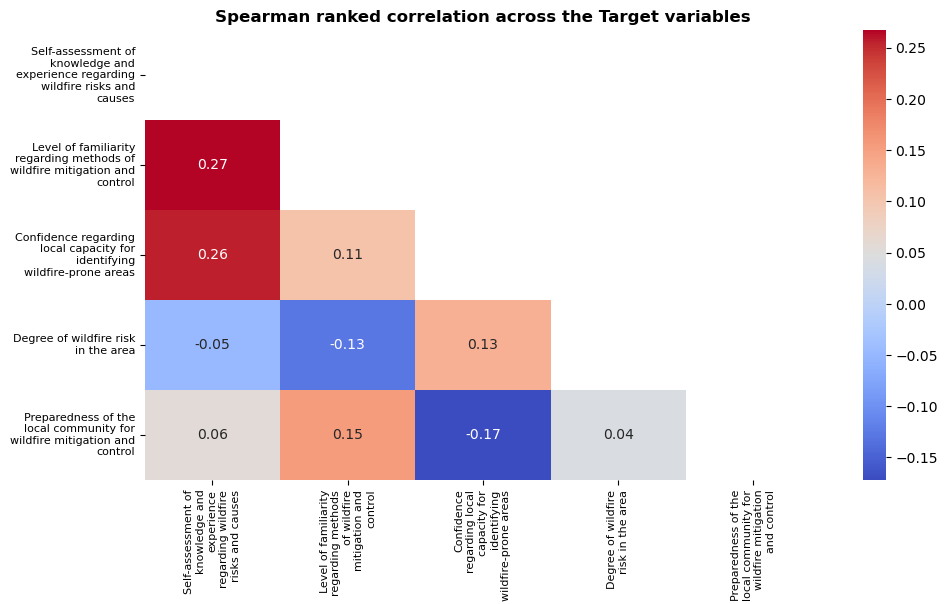

In [157]:
#Now conducting spearman rank correlation test of the ordinal values
Spearman_corr = Selected_478.iloc[:, -5:].corr(method = "spearman")

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(Spearman_corr,
            annot  = True,
            cmap = "coolwarm",
            fmt = ".2f",
            ax = ax,
            mask = np.triu(Spearman_corr))
ax.set_title("Spearman ranked correlation across the Target variables",
             fontweight = "bold")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")
plt.tight_layout()
plt.show()


### Ordinal Logistic Regression

In [163]:
#Preapring the exogenous and endogenous variables for conducting the ordinal logistic regression
Exo_variable  = Selected_478.iloc[:, 0:25]
Endo_variable  = Selected_478.iloc[:, -5:]

#### For Degree of wildfire risk in the area

In [160]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod = OrderedModel(Endo_variable["Degree of wildfire risk in the area"], Exo_variable, distr = "logit") #We shall be deploying the logit distribution
res = mod.fit(method = "bfgs") #The ordinal regression uses the Maximulm Likelihood Estimator (MLE) method versus OLS where least distances are seeked
                               #As we are dealing with non-paramatric 
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.234243
         Iterations: 136
         Function evaluations: 144
         Gradient evaluations: 144
                                      OrderedModel Results                                     
Dep. Variable:     Degree of wildfire risk in the area   Log-Likelihood:                -589.97
Model:                                    OrderedModel   AIC:                             1238.
Method:                             Maximum Likelihood   BIC:                             1359.
Date:                                 Tue, 04 Nov 2025                                         
Time:                                         10:11:59                                         
No. Observations:                                  478                                         
Df Residuals:                                      449                                         
Df Model:                                           25   

#### For Self-assessment of knowledge and experience regarding wildfire risks and causes

In [161]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod = OrderedModel(Endo_variable["Self-assessment of knowledge and experience regarding wildfire risks and causes"], Exo_variable, distr = "logit") #We shall be deploying the logit distribution
res = mod.fit(method = "bfgs") #The ordinal regression uses the Maximulm Likelihood Estimator (MLE) method versus OLS where least distances are seeked
                               #As we are dealing with non-paramatric 
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.409309
         Iterations: 131
         Function evaluations: 138
         Gradient evaluations: 138
                                                            OrderedModel Results                                                           
Dep. Variable:     Self-assessment of knowledge and experience regarding wildfire risks and causes   Log-Likelihood:                -673.65
Model:                                                                                OrderedModel   AIC:                             1407.
Method:                                                                         Maximum Likelihood   BIC:                             1532.
Date:                                                                             Tue, 04 Nov 2025                                         
Time:                                                                                     12:47:30                           

#### For preparedness of the local community for wildfire mitigation and control

In [165]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod = OrderedModel(Endo_variable["Preparedness of the local community for wildfire mitigation and control"], Exo_variable, distr = "logit") #We shall be deploying the logit distribution
res = mod.fit(method = "bfgs") #The ordinal regression uses the Maximulm Likelihood Estimator (MLE) method versus OLS where least distances are seeked
                               #As we are dealing with non-paramatric 
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.406119
         Iterations: 179
         Function evaluations: 186
         Gradient evaluations: 186
                                                        OrderedModel Results                                                       
Dep. Variable:     Preparedness of the local community for wildfire mitigation and control   Log-Likelihood:                -194.13
Model:                                                                        OrderedModel   AIC:                             444.3
Method:                                                                 Maximum Likelihood   BIC:                             561.0
Date:                                                                     Tue, 04 Nov 2025                                         
Time:                                                                             12:56:00                                         
No. Observations:                

# Spatial Analysis

## Data Preparation - Clustering and pre-visualization

In [50]:
#cluster_dataframe shall be used for spatial analysis
Cluster_dataframe = Selected_486[["House GPS latitude",
                                  "House GPS longitude",
                                  "House GPS altitude",
                                  "Self-assessment of knowledge and experience regarding wildfire risks and causes",
                                  "Level of familiarity regarding methods of wildfire mitigation and control",
                                  "Confidence regarding local capacity for identifying wildfire-prone areas",
                                  "Degree of wildfire risk in the area",
                                  "Preparedness of the local community for wildfire mitigation and control"]]

Cluster_dataframe = pd.merge(Selected["Municipality name"], Cluster_dataframe, on = "S.N.")
Cluster_dataframe = Cluster_dataframe.dropna(subset = ["House GPS longitude"])
Cluster_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 19.0 to 484.0
Data columns (total 9 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Municipality name                                                                226 non-null    object 
 1   House GPS latitude                                                               226 non-null    float64
 2   House GPS longitude                                                              226 non-null    float64
 3   House GPS altitude                                                               226 non-null    float64
 4   Self-assessment of knowledge and experience regarding wildfire risks and causes  226 non-null    int8   
 5   Level of familiarity regarding methods of wildfire mitigation and control        226 non-null    int8   
 6   Confidence 

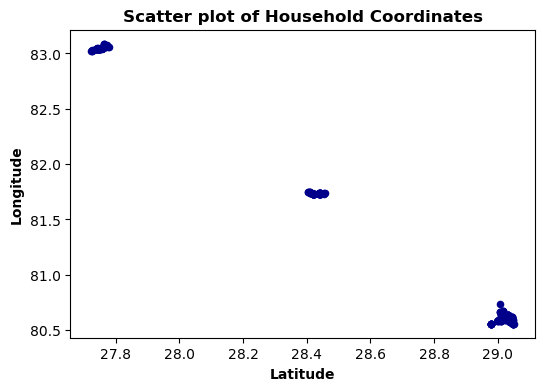

In [51]:
#Pre-visualizing the coordinates in a scatter plot format
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(Cluster_dataframe["House GPS latitude"],
           Cluster_dataframe["House GPS longitude"],
           marker = "o",
           s = 20, 
           color = "darkblue")
ax.set_xlabel("Latitude",
              fontweight = "bold")
ax.set_ylabel("Longitude",
              fontweight = "bold")
plt.title("Scatter plot of Household Coordinates",
          fontweight = "bold")
plt.show()

In [52]:
# Selecting data frame from different clusters to perform independent kmeans cluster analysis for each cluster-complex. We shall try and build 
# three cluster each for all complexes.   
Selected_Chure = Cluster_dataframe[Cluster_dataframe["Municipality name"] == "Chure Rural Municipality"]
Selected_Bheriganga = Cluster_dataframe[Cluster_dataframe["Municipality name"] == "Bheri Ganga Municipality"]
Selected_Lumbini = Cluster_dataframe[(Cluster_dataframe["Municipality name"] == "Buddhabhumi Municipality") | (Cluster_dataframe["Municipality name"] == "Sitganga Municipality")] 

## KMeans clustering for centriod based coordinates clustering

### KMeans fitting for Chure Complex

In [53]:
#For Chure complex
Coord_Chure = Selected_Chure[["House GPS latitude", "House GPS longitude"]]
from sklearn.cluster import KMeans
kmeans_Chure = KMeans(init = "k-means++",
                n_init = "auto", 
                n_clusters = 2, #reiterations of number of clusters was made to ensure that the cluster had even number of points
                random_state = 0)
kmeans_Chure.fit(Coord_Chure)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [54]:
#Now labelling the coordinates to their respective clusters
kmeans_Chure_assign = kmeans_Chure.labels_
Coord_Chure["Kmeans clusters"] = kmeans_Chure_assign
Coord_Chure["Kmeans clusters"].value_counts()

C:\Users\prien\AppData\Local\Temp\ipykernel_17784\3796470000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coord_Chure["Kmeans clusters"] = kmeans_Chure_assign


Kmeans clusters
0    56
1    52
Name: count, dtype: int64

In [55]:
#Now building the cluster centers
kmeans_cluster_centers =  kmeans_Chure.cluster_centers_
Kmeans_centers = pd.DataFrame(kmeans_cluster_centers) #Turning the cluster centers into dataframes for visualization purpose only
Kmeans_centers.columns = ["Latitudes", "Longitudes"]
Kmeans_centers

,Latitudes,Longitudes
0,29.022292,80.577592
1,29.025336,80.634460


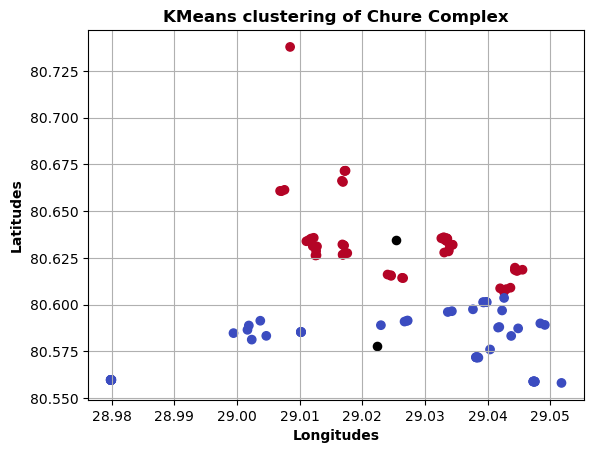

In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Coord_Chure["House GPS latitude"],
           Coord_Chure["House GPS longitude"],
           c = Coord_Chure["Kmeans clusters"],
           cmap= "coolwarm")
ax.scatter(Kmeans_centers["Latitudes"],
           Kmeans_centers["Longitudes"],
           s = 35,
           color = "black")
ax.set_title("KMeans clustering of Chure Complex",
             fontweight = "bold")
ax.set_xlabel("Longitudes",
              fontweight = "bold")
ax.set_ylabel("Latitudes",
              fontweight = "bold")
ax.grid(True)
plt.show()

In [57]:
#Now coding the Kmeans clusters into unique CLuster ID for combining with all clusters across different complexes
Coord_Chure["Kmeans clusters"].replace(0, "0C", inplace = True)
Coord_Chure["Kmeans clusters"].replace(1, "1C", inplace = True)

C:\Users\prien\AppData\Local\Temp\ipykernel_17784\779856283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Coord_Chure["Kmeans clusters"].replace(0, "0C", inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_17784\779856283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coord_Chure["Kmeans clusters"].replace(0, "0C", inplace =

### KMeans fitting for Bheriganga Complex

In [58]:
#For Bheriganga complex 
Coord_Bheriganga = Selected_Bheriganga[["House GPS latitude", "House GPS longitude"]]
from sklearn.cluster import KMeans
kmeans_Bheriganga = KMeans(init = "k-means++",
                n_init = "auto", 
                n_clusters = 3, 
                random_state = 0)  
kmeans_Bheriganga.fit(Coord_Bheriganga)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [59]:
#Now labelling the coordinates to their respective clusters
kmeans_Bheriganga_assign = kmeans_Bheriganga.labels_
Coord_Bheriganga["Kmeans clusters"] = kmeans_Bheriganga_assign

C:\Users\prien\AppData\Local\Temp\ipykernel_17784\1415790483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coord_Bheriganga["Kmeans clusters"] = kmeans_Bheriganga_assign


In [60]:
#Now building the cluster centers
kmeans_cluster_centers =  kmeans_Bheriganga.cluster_centers_
Kmeans_centers = pd.DataFrame(kmeans_cluster_centers)
Kmeans_centers.columns = ["Latitudes", "Longitudes"]
Kmeans_centers

,Latitudes,Longitudes
0,28.420653,81.728331
1,28.442378,81.735314
2,28.407630,81.744698


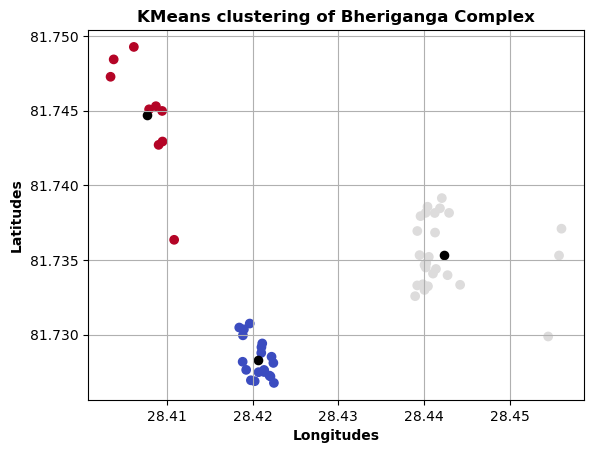

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Coord_Bheriganga["House GPS latitude"],
           Coord_Bheriganga["House GPS longitude"],
           c = Coord_Bheriganga["Kmeans clusters"],
           cmap= "coolwarm")
ax.scatter(Kmeans_centers["Latitudes"],
           Kmeans_centers["Longitudes"],
           s = 35,
           color = "black")
ax.set_title("KMeans clustering of Bheriganga Complex",
             fontweight = "bold")
ax.set_xlabel("Longitudes",
              fontweight = "bold")
ax.set_ylabel("Latitudes",
              fontweight = "bold")
ax.grid(True)
plt.show()

In [62]:
Coord_Bheriganga["Kmeans clusters"].value_counts()

Kmeans clusters
1    27
0    20
2     9
Name: count, dtype: int64

In [63]:
#Converting the cluster labels into Cluster IDs
Coord_Bheriganga["Kmeans clusters"].replace(1, "1B", inplace = True)
Coord_Bheriganga["Kmeans clusters"].replace(0, "0B", inplace = True)
Coord_Bheriganga["Kmeans clusters"].replace(2, "2B", inplace = True)
Coord_Bheriganga["Kmeans clusters"].value_counts()

C:\Users\prien\AppData\Local\Temp\ipykernel_17784\1750288211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Coord_Bheriganga["Kmeans clusters"].replace(1, "1B", inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_17784\1750288211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coord_Bheriganga["Kmeans clusters"].replace(1, "1B

Kmeans clusters
1B    27
0B    20
2B     9
Name: count, dtype: int64

### KMeans fitting for Lumbini Complex

In [64]:
#For Lumbini complex 
Coord_Lumbini = Selected_Lumbini[["House GPS latitude", "House GPS longitude"]]
from sklearn.cluster import KMeans
kmeans_Lumbini = KMeans(init = "k-means++",
                n_init = "auto", 
                n_clusters = 2, 
                random_state = 0)  
kmeans_Lumbini.fit(Coord_Lumbini)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [65]:
#Now labelling the coordinates to their respective clusters
kmeans_Lumbini_assign = kmeans_Lumbini.labels_
Coord_Lumbini["Kmeans clusters"] = kmeans_Lumbini_assign

C:\Users\prien\AppData\Local\Temp\ipykernel_17784\596227359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coord_Lumbini["Kmeans clusters"] = kmeans_Lumbini_assign


In [66]:
#Now building the cluster centers
kmeans_cluster_centers =  kmeans_Lumbini.cluster_centers_
Kmeans_centers = pd.DataFrame(kmeans_cluster_centers)
Kmeans_centers.columns = ["Latitudes", "Longitudes"]
Kmeans_centers

,Latitudes,Longitudes
0,27.760385,83.056356
1,27.742116,83.039976


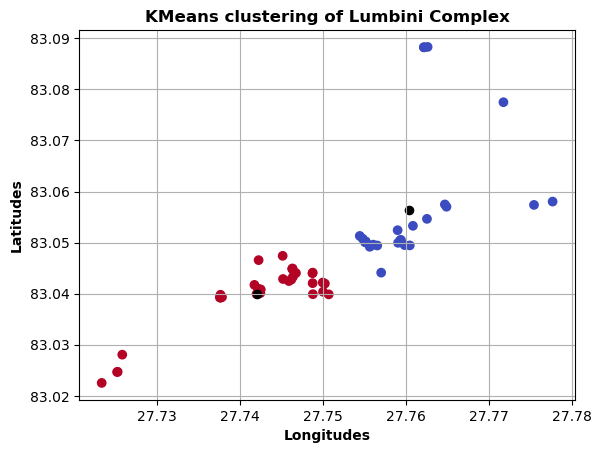

In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Coord_Lumbini["House GPS latitude"],
           Coord_Lumbini["House GPS longitude"],
           c = Coord_Lumbini["Kmeans clusters"],
           cmap= "coolwarm")
ax.scatter(Kmeans_centers["Latitudes"],
           Kmeans_centers["Longitudes"],
           s = 35,
           color = "black")
ax.set_title("KMeans clustering of Lumbini Complex",
             fontweight = "bold")
ax.set_xlabel("Longitudes",
              fontweight = "bold")
ax.set_ylabel("Latitudes",
              fontweight = "bold")
ax.grid(True)
plt.show()

In [68]:
#Converting the cluster labels into Cluster IDs
Coord_Lumbini["Kmeans clusters"].replace(1, "1L", inplace = True)
Coord_Lumbini["Kmeans clusters"].replace(0, "0L", inplace = True)
Coord_Lumbini["Kmeans clusters"].value_counts()

C:\Users\prien\AppData\Local\Temp\ipykernel_17784\2965099533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Coord_Lumbini["Kmeans clusters"].replace(1, "1L", inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_17784\2965099533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coord_Lumbini["Kmeans clusters"].replace(1, "1L", inp

Kmeans clusters
1L    34
0L    28
Name: count, dtype: int64

In [69]:
Coord_Lumbini.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 19.0 to 484.0
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   House GPS latitude   62 non-null     float64
 1   House GPS longitude  62 non-null     float64
 2   Kmeans clusters      62 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


### KMeans cluster outputs and visualization

In [70]:
#Now concating all Cluster labels vertically and sorting them out
Cluster_ID = pd.concat([Coord_Chure, Coord_Bheriganga, Coord_Lumbini])
Cluster_ID.sort_index(inplace = True)
Cluster_ID["Kmeans clusters"].value_counts()
#So, the smallest cluster we have has 9 HHS points. This can serve as a reference to command minimum cluster size for density-based clustering methods
#if it doesnt generate large noises

Kmeans clusters
0C    56
1C    52
1L    34
0L    28
1B    27
0B    20
2B     9
Name: count, dtype: int64

In [71]:
#Merging the main data with the column that specifically contains KMeans Cluster IDs to allow further analysis
Cluster_dataframe = pd.merge(Cluster_dataframe, Cluster_ID["Kmeans clusters"], on = "S.N.", how = "inner")
Cluster_dataframe.to_csv("Cluster_dataframe.csv")

In [72]:
#Visualizing the clusters spatially for KMeans clusters
import leafmap
File = pd.read_csv("Cluster_dataframe.csv")
Cluster = pd.DataFrame(File) #for some reason (must be a bug in leafmap), the map can't load unless read from a csv to begin with

map = leafmap.Map(center = [28.2318, 83.8184], zoom = 5)
map.add_points_from_xy(data = Cluster,
                     x = "House GPS longitude",
                     y = "House GPS latitude",
                     color_column = "Kmeans clusters",
                     layer_name = "Cluster Points",
                     add_legend = True,
                     marker_size = 5,
                     cmap = "tab10",
                     max_cluster_radius = 0)
map

The provided color string (lightred) is invalid. Using the default black color.


Map(center=[28.2318, 83.8184], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

## HDBSCAN Clustering for Density-based Coordinate Clustering

### Conducting HDBSCAN for Chure Complex

In [73]:
Coord_Chure_HDB = Selected_Chure[["House GPS latitude", "House GPS longitude"]]
import hdbscan
clustersize = 5 #we have directed the tool to have minimum cluster size of 5 coordinates
HDB = hdbscan.HDBSCAN(min_cluster_size=clustersize,
                      metric  ="euclidean")
HDB.fit(Coord_Chure_HDB)

HDBSCAN()

In [74]:
Coord_Chure_HDB["HDB clusters"] = HDB.fit_predict(Coord_Chure_HDB)
Coord_Chure_HDB["HDB clusters"].value_counts()

HDB clusters
 3    18
 6    15
 4    14
 7    14
 0    11
-1    10
 5    10
 2     8
 1     8
Name: count, dtype: int64

In [75]:
Coord_Chure_HDB.replace(-1, "noise", inplace = True)
Coord_Chure_HDB.replace(0, "0C", inplace = True)
Coord_Chure_HDB.replace(1, "1C", inplace = True)
Coord_Chure_HDB.replace(2, "2C", inplace = True)
Coord_Chure_HDB.replace(3, "3C", inplace = True)
Coord_Chure_HDB.replace(4, "4C", inplace = True)
Coord_Chure_HDB.replace(5, "5C", inplace = True)
Coord_Chure_HDB.replace(6, "6C", inplace = True)
Coord_Chure_HDB.replace(7, "7C", inplace = True)

### Conducting HDBSCAN for Bheriganga Complex

In [76]:
Coord_Bheriganga_HDB = Selected_Bheriganga[["House GPS latitude", "House GPS longitude"]]
import hdbscan
clustersize = 5
HDB = hdbscan.HDBSCAN(min_cluster_size=clustersize,
                      metric  ="euclidean")
HDB.fit(Coord_Bheriganga_HDB)

HDBSCAN()

In [77]:
Coord_Bheriganga_HDB["HDB clusters"] = HDB.fit_predict(Coord_Bheriganga_HDB)
Coord_Bheriganga_HDB["HDB clusters"].value_counts()

HDB clusters
0    27
2    20
1     9
Name: count, dtype: int64

In [78]:
Coord_Bheriganga_HDB.replace(0, "0B", inplace = True)
Coord_Bheriganga_HDB.replace(1, "1B", inplace = True)
Coord_Bheriganga_HDB.replace(2, "2B", inplace = True)

### Conducting HDBSCAN for Lumbini Complex

In [79]:
Coord_Lumbini_HDB = Selected_Lumbini[["House GPS latitude", "House GPS longitude"]]
import hdbscan
clustersize = 5
HDB = hdbscan.HDBSCAN(min_cluster_size=clustersize,
                      metric  ="euclidean")
HDB.fit(Coord_Lumbini_HDB)

HDBSCAN()

In [80]:
Coord_Lumbini_HDB["HDB clusters"] = HDB.fit_predict(Coord_Lumbini_HDB)
Coord_Lumbini_HDB["HDB clusters"].value_counts()

HDB clusters
-1    17
 2    16
 3    10
 4     7
 1     6
 0     6
Name: count, dtype: int64

In [81]:
Coord_Lumbini_HDB.replace(-1, "noise", inplace = True)
Coord_Lumbini_HDB.replace(0, "0L", inplace = True)
Coord_Lumbini_HDB.replace(1, "1L", inplace = True)
Coord_Lumbini_HDB.replace(2, "2L", inplace = True)
Coord_Lumbini_HDB.replace(3, "3L", inplace = True)
Coord_Lumbini_HDB.replace(4, "4L", inplace = True)

### HDB Cluster outputs and visualization

In [82]:
#Now concating all Cluster labels vertically and sorting them out
Cluster_ID_HDB = pd.concat([Coord_Chure_HDB, Coord_Bheriganga_HDB, Coord_Lumbini_HDB])
Cluster_ID_HDB["HDB clusters"].value_counts()

HDB clusters
noise    27
0B       27
2B       20
3C       18
2L       16
6C       15
4C       14
7C       14
0C       11
5C       10
3L       10
1B        9
2C        8
1C        8
4L        7
0L        6
1L        6
Name: count, dtype: int64

In [83]:
#Merging the main data with the column that specifically contains KMeans Cluster IDs to allow further analysis
Cluster_dataframe = pd.merge(Cluster_dataframe, Cluster_ID_HDB["HDB clusters"], on = "S.N.", how = "inner")
Cluster_dataframe.to_csv("Cluster_dataframe.csv")

In [84]:
#Visualizing the clusters spatially for HDB clusters
import leafmap
File = pd.read_csv("Cluster_dataframe.csv")
Cluster = pd.DataFrame(File) #for some reason (must be a bug in leafmap), the map can't load unless read from a csv to begin with

map = leafmap.Map(center = [28.2318, 83.8184], zoom = 5)
map.add_points_from_xy(data = Cluster,
                     x = "House GPS longitude",
                     y = "House GPS latitude",
                     color_column = "HDB clusters",
                     layer_name = "Cluster Points",
                     add_legend = True,
                     marker_size = 5,
                     cmap = "tab10",
                     max_cluster_radius = 0)
map

The provided color string (lightred) is invalid. Using the default black color.
The provided color string (darkpurple) is invalid. Using the default black color.


Map(center=[28.2318, 83.8184], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

## Kruskal-Walis and Dunn's Post-Hoc Test for Cluster homogeneity

### For Degree of Wildfire risk perception

In [85]:
#Preparing the Kmeans Clusters for Kruskal Walis Test
Kmeans_0C = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0C"]["Degree of wildfire risk in the area"]
Kmeans_1C = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1C"]["Degree of wildfire risk in the area"]
Kmeans_1L = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1L"]["Degree of wildfire risk in the area"]
Kmeans_0L = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0L"]["Degree of wildfire risk in the area"]
Kmeans_1B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1B"]["Degree of wildfire risk in the area"]
Kmeans_0B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0B"]["Degree of wildfire risk in the area"]
Kmeans_2B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "2B"]["Degree of wildfire risk in the area"]

#Preparing the HDB Clusters for Kruskal Walis Test
HDB_0B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0B"]["Degree of wildfire risk in the area"]
HDB_noise = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "noise"]["Degree of wildfire risk in the area"]
HDB_2B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2B"]["Degree of wildfire risk in the area"]
HDB_3C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "3C"]["Degree of wildfire risk in the area"]
HDB_2L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2L"]["Degree of wildfire risk in the area"]
HDB_6C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "6C"]["Degree of wildfire risk in the area"]
HDB_4C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "4C"]["Degree of wildfire risk in the area"]
HDB_7C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "7C"]["Degree of wildfire risk in the area"]
HDB_0C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0C"]["Degree of wildfire risk in the area"]
HDB_5C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "5C"]["Degree of wildfire risk in the area"]
HDB_3L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "3L"]["Degree of wildfire risk in the area"]
HDB_1B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1B"]["Degree of wildfire risk in the area"]
HDB_1C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1C"]["Degree of wildfire risk in the area"]
HDB_2C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2C"]["Degree of wildfire risk in the area"]
HDB_4L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "4L"]["Degree of wildfire risk in the area"]
HDB_0L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0L"]["Degree of wildfire risk in the area"]
HDB_1L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1L"]["Degree of wildfire risk in the area"]

In [86]:
#Now performing Kruskal-Walis Test between Kmeans cluster IDs and Degree of wildfire risk in the area
from scipy import stats
H_statistic, p_value = stats.kruskal(Kmeans_0C, Kmeans_1C, Kmeans_1L, Kmeans_0L, Kmeans_1B, Kmeans_0B, Kmeans_2B)
H_statistic, p_value

(np.float64(68.25323701561582), np.float64(9.323788658833433e-13))

In [87]:
#Now performing the Dunn's post-hoc test
import numpy as np
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(a = Cluster_dataframe,
                              val_col = "Degree of wildfire risk in the area",
                              group_col = "Kmeans clusters",
                              p_adjust = "bonferroni")

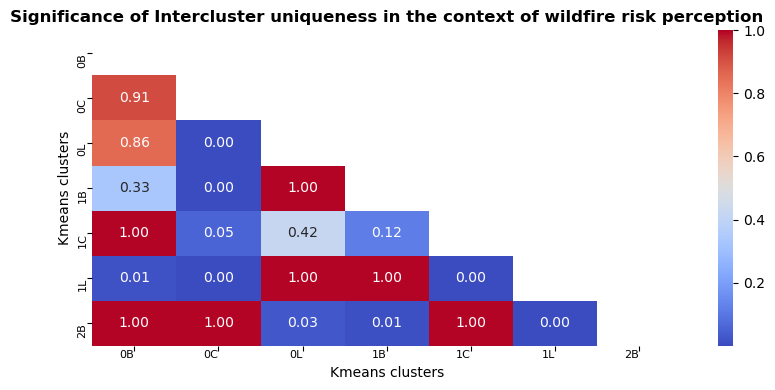

In [88]:
#Viewing the result on a heat map
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(dunn_result,
            annot  = True,
            cmap = "coolwarm",
            fmt = ".2f",
            ax = ax,
            mask = np.triu(dunn_result))
ax.set_title("Significance of Intercluster uniqueness in the context of wildfire risk perception",
             fontweight = "bold")
ax.set_xlabel("Kmeans clusters")
ax.set_ylabel("Kmeans clusters")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")
plt.tight_layout()
plt.show()

In [89]:
#Now performing Kruskal-Walis Test between HDB cluster IDs and Degree of wildfire risk in the area
from scipy import stats
H_statistic, p_value = stats.kruskal(HDB_0B, HDB_1B, HDB_2B, 
                                     HDB_0C, HDB_1C, HDB_2C, HDB_3C, HDB_4C, HDB_5C, HDB_6C, HDB_7C,
                                     HDB_0L, HDB_1L, HDB_2L, HDB_3L, HDB_4L,
                                     HDB_noise)
H_statistic, p_value

(np.float64(73.30179963824956), np.float64(2.616575250840453e-09))

In [90]:
#Now performing the Dunn's post-hoc test
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(a = Cluster_dataframe,
                              val_col = "Degree of wildfire risk in the area",
                              group_col = "HDB clusters",
                              p_adjust = "bonferroni")

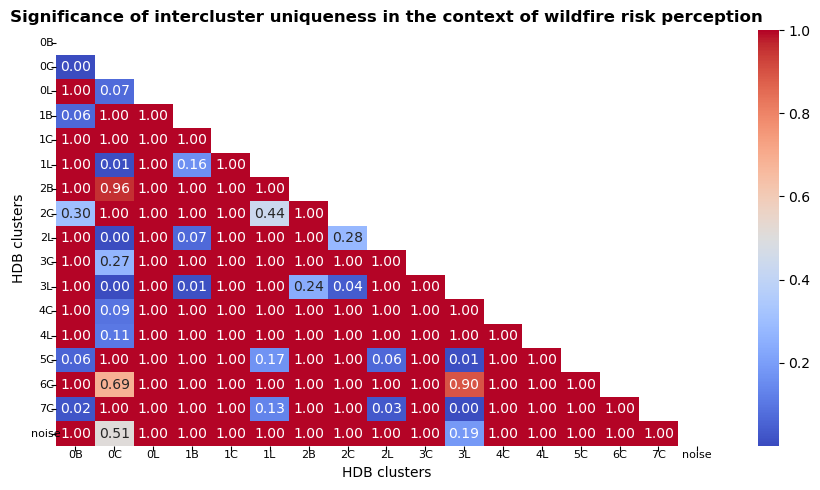

In [91]:
#Viewing the result on a heat map
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (9,5))
sns.heatmap(dunn_result,
            annot  = True,
            cmap = "coolwarm",
            fmt = ".2f",
            ax = ax,
            mask = np.triu(dunn_result))
ax.set_title("Significance of intercluster uniqueness in the context of wildfire risk perception",
             fontweight = "bold")
ax.set_xlabel("HDB clusters")
ax.set_ylabel("HDB clusters")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")
plt.tight_layout()
plt.show()

### For Self-assessment for knowledge and experience regarding wildfire risks and causes

In [92]:
#Preparing the Kmeans Clusters for Kruskal Walis Test
Kmeans_0C = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
Kmeans_1C = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
Kmeans_1L = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1L"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
Kmeans_0L = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0L"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
Kmeans_1B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1B"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
Kmeans_0B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0B"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
Kmeans_2B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "2B"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]

#Preparing the HDB Clusters for Kruskal Walis Test
HDB_0B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0B"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_noise = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "noise"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_2B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2B"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_3C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "3C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_2L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2L"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_6C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "6C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_4C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "4C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_7C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "7C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_0C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_5C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "5C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_3L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "3L"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_1B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1B"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_1C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_2C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2C"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_4L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "4L"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_0L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0L"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]
HDB_1L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1L"]["Self-assessment of knowledge and experience regarding wildfire risks and causes"]

In [93]:
#Now performing Kruskal-Walis Test between Kmeans cluster IDs and knowledge Self-assessment
from scipy import stats
H_statistic, p_value = stats.kruskal(Kmeans_0C, Kmeans_1C, Kmeans_1L, Kmeans_0L, Kmeans_1B, Kmeans_0B, Kmeans_2B)
H_statistic, p_value

(np.float64(13.840305966200505), np.float64(0.031471804830713136))

In [94]:
#Now performing the Dunn's post-hoc test
import numpy as np
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(a = Cluster_dataframe,
                              val_col = "Degree of wildfire risk in the area",
                              group_col = "Kmeans clusters",
                              p_adjust = "bonferroni")

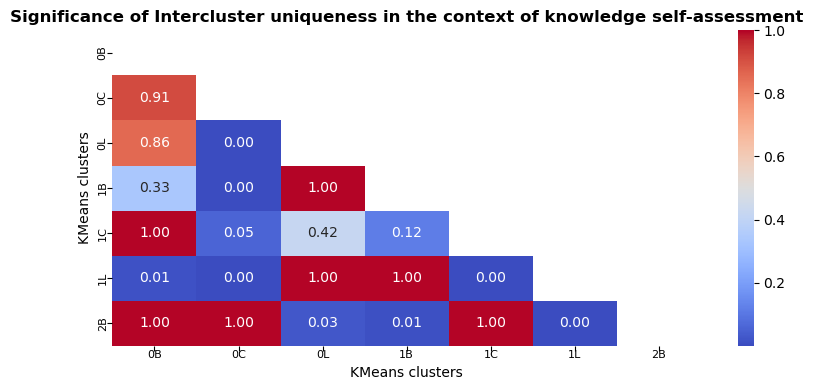

In [95]:
#Viewing the result on a heat map
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(dunn_result,
            annot  = True,
            cmap = "coolwarm",
            fmt = ".2f",
            ax = ax,
            mask = np.triu(dunn_result))
ax.set_title("Significance of Intercluster uniqueness in the context of knowledge self-assessment",
             fontweight = "bold")
ax.set_xlabel("KMeans clusters")
ax.set_ylabel("KMeans clusters")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")
plt.tight_layout()
plt.show()

In [96]:
#Now performing Kruskal-Walis Test between HDB cluster IDs and knowledge self-assessment
from scipy import stats
H_statistic, p_value = stats.kruskal(HDB_0B, HDB_1B, HDB_2B, 
                                     HDB_0C, HDB_1C, HDB_2C, HDB_3C, HDB_4C, HDB_5C, HDB_6C, HDB_7C,
                                     HDB_0L, HDB_1L, HDB_2L, HDB_3L, HDB_4L,
                                     HDB_noise)
H_statistic, p_value

(np.float64(23.446972026998882), np.float64(0.10229831377676553))

In [97]:
#Now performing the Dunn's post-hoc test
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(a = Cluster_dataframe,
                              val_col = "Self-assessment of knowledge and experience regarding wildfire risks and causes",
                              group_col = "HDB clusters",
                              p_adjust = "bonferroni")

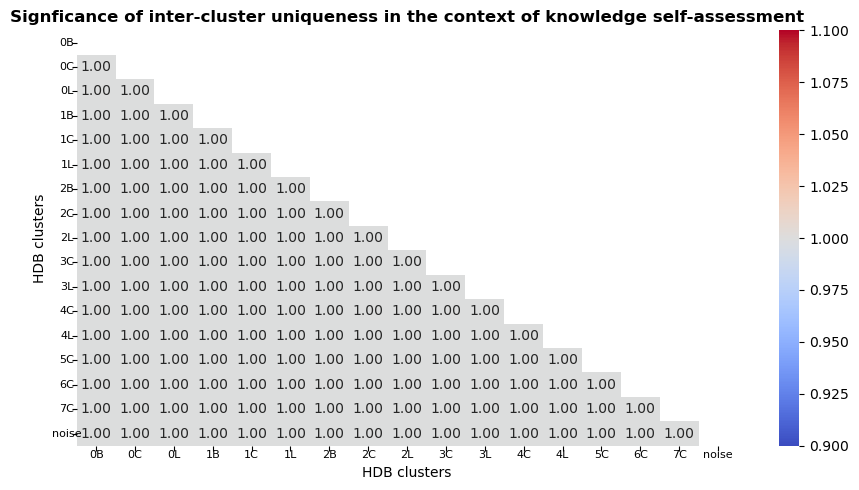

In [98]:
#Viewing the result on a heat map
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (9,5))
sns.heatmap(dunn_result,
            annot  = True,
            cmap = "coolwarm",
            fmt = ".2f",
            ax = ax,
            mask = np.triu(dunn_result))
ax.set_title("Signficance of inter-cluster uniqueness in the context of knowledge self-assessment",
             fontweight = "bold")
ax.set_xlabel("HDB clusters")
ax.set_ylabel("HDB clusters")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")
plt.tight_layout()
plt.show()

### For Preparedness of the local community for wildfire mitigation and control

In [99]:
#Preparing the Kmeans Clusters for Kruskal Walis Test
Kmeans_0C = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0C"]["Preparedness of the local community for wildfire mitigation and control"]
Kmeans_1C = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1C"]["Preparedness of the local community for wildfire mitigation and control"]
Kmeans_1L = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1L"]["Preparedness of the local community for wildfire mitigation and control"]
Kmeans_0L = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0L"]["Preparedness of the local community for wildfire mitigation and control"]
Kmeans_1B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "1B"]["Preparedness of the local community for wildfire mitigation and control"]
Kmeans_0B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "0B"]["Preparedness of the local community for wildfire mitigation and control"]
Kmeans_2B = Cluster_dataframe[Cluster_dataframe["Kmeans clusters"] == "2B"]["Preparedness of the local community for wildfire mitigation and control"]

#Preparing the HDB Clusters for Kruskal Walis Test
HDB_0B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0B"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_noise = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "noise"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_2B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2B"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_3C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "3C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_2L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2L"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_6C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "6C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_4C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "4C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_7C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "7C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_0C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_5C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "5C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_3L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "3L"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_1B = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1B"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_1C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_2C = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "2C"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_4L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "4L"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_0L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "0L"]["Preparedness of the local community for wildfire mitigation and control"]
HDB_1L = Cluster_dataframe[Cluster_dataframe["HDB clusters"] == "1L"]["Preparedness of the local community for wildfire mitigation and control"]

In [100]:
#Now performing Kruskal-Walis Test between Kmeans cluster IDs and Self-assessment.....
from scipy import stats
H_statistic, p_value = stats.kruskal(Kmeans_0C, Kmeans_1C, Kmeans_1L, Kmeans_0L, Kmeans_1B, Kmeans_0B, Kmeans_2B)
H_statistic, p_value

(np.float64(28.915085614970277), np.float64(6.312969414191631e-05))

In [101]:
#Now performing the Dunn's post-hoc test
import numpy as np
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(a = Cluster_dataframe,
                              val_col = "Preparedness of the local community for wildfire mitigation and control",
                              group_col = "Kmeans clusters",
                              p_adjust = "bonferroni")

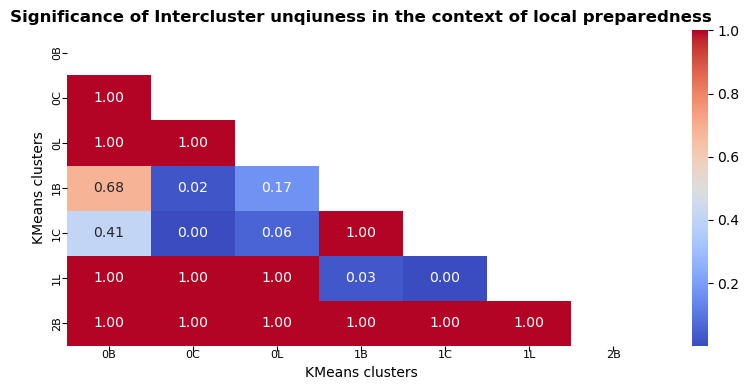

In [102]:
#Viewing the result on a heat map
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(dunn_result,
            annot  = True,
            cmap = "coolwarm",
            fmt = ".2f",
            ax = ax,
            mask = np.triu(dunn_result))
ax.set_title("Significance of Intercluster unqiuness in the context of local preparedness",
             fontweight = "bold")
ax.set_xlabel("KMeans clusters")
ax.set_ylabel("KMeans clusters")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")
plt.tight_layout()
plt.show()

In [103]:
#Now performing the Dunn's post-hoc test
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(a = Cluster_dataframe,
                              val_col = "Preparedness of the local community for wildfire mitigation and control",
                              group_col = "HDB clusters",
                              p_adjust = "bonferroni")

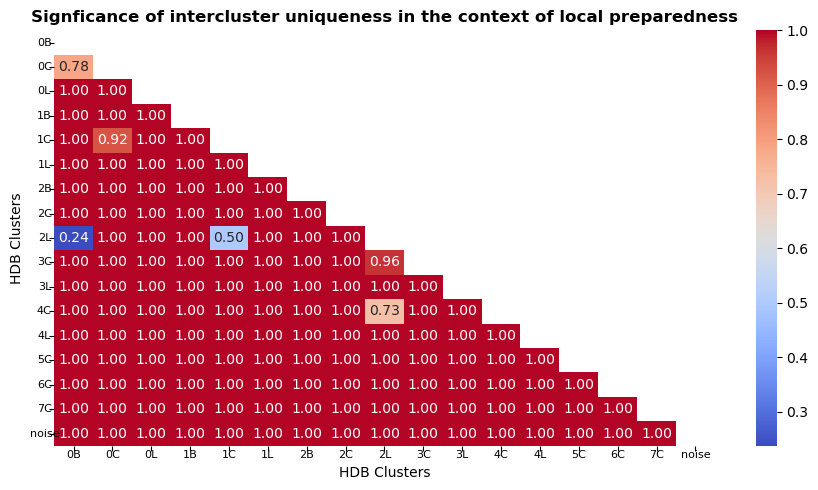

In [104]:
#Viewing the result on a heat map
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (9,5))
sns.heatmap(dunn_result,
            annot  = True,
            cmap = "coolwarm",
            fmt = ".2f",
            ax = ax,
            mask = np.triu(dunn_result))
ax.set_title("Signficance of intercluster uniqueness in the context of local preparedness",
             fontweight = "bold")
ax.set_xlabel("HDB Clusters")
ax.set_ylabel("HDB Clusters")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("center")
    labels.set_va("center")
plt.tight_layout()
plt.show()